In [1]:
from selenium import webdriver
import csv
import time
import os
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re 
import numpy as np
import pprint # 출력 깔끔하게 하는 모듈

options = webdriver.ChromeOptions() 
options.add_argument('headless')  #크롬 옵션인데 창 보이게 할지 안할지 , 안보이게 하고 싶으면 chrome_options=options 입력
options.add_argument("lang=ko_KR")


In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl  # plot  관련 모듈
from future.utils import iteritems
from collections import Counter
from sklearn.manifold import TSNE # T분포 확률적 임베딩 모듈
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
def wait(browser, sec):
    time.sleep(sec)
    browser.implicitly_wait(sec)
    
def ReEmoji(asd): # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', asd) 
    return result

def reMove(Fn):
    LA = [] # 해시태그 지우면서 띄우고, 그다음 하나씩 나누기
    for i in Fn['Post']:
        Fl = i.replace("#"," ")
        fl = Fl.split()
        LA.append(fl)
    LB = sum(LA, []) # 2중 리스트 지우기
    return LB

def re2list(맛집리스트):
    J = " ".join(맛집리스트)
    LC = ReEmoji(J)
    list_LC = LC.split()
    return list_LC

In [3]:
driver_dir = 'C:\\Users\\John\\Anaconda3\\Scripts\\chromedriver'

A = []

query = input("* 검색어 입력: ")

times = int(input("* 게시물 개수 입력: "))
print("* 브라우저 실행 중...")
browser = webdriver.Chrome(driver_dir)
browser.get("https://www.instagram.com/explore/tags/{}".format(query))

wait(browser,2)

browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div/div[2]').click()

wait(browser, 5)

name = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/header/div[2]/div[1]/div[1]/h2/a').text
post = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/li[1]/div/div/div/span').text
post1 = post.replace('\n', ' ')
post2 = post1.replace('.', '')
Likes = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span').text
List = [name, post2, Likes]
A.append(List)
browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a').click()                       
wait(browser,2)

Tryyy = 0 
while Tryyy < times:
    try:
        name = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/header/div[2]/div[1]/div[1]/h2/a').text
        post = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[1]/ul/li[1]/div/div/div/span').text
        post1 = post.replace('\n', ' ')
        post2 = post1.replace('.', '')
        Likes = browser.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span').text
        List = [name, post2, Likes]
        A.append(List)
        browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a[2]').click()
        wait(browser,2)
        
        Tryyy= Tryyy + 1
        
    except:
        browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a[2]').click()
        wait(browser,1)
        

Col = ["Name", "Post", "Likes"]
df = pd.DataFrame.from_records(A, columns = Col)
dfX = df.drop_duplicates(['Name']) # 이름 중복 제거
dfY = dfX.drop_duplicates(['Post']) # 같은 글 중복 제거
Fn = pd.DataFrame.from_records(dfY, columns = Col) # 0번부터 재배열
Fn.to_excel(query + '.xlsx', sheet_name='sheet1') #excel 파일로 만들기


print("* 완료")

* 검색어 입력: as
* 게시물 개수 입력: s


ValueError: invalid literal for int() with base 10: 's'

In [16]:
A # Crawling 결과물, 동영상은 자동으로 걸러짐

[['tindragooon',
  ' 제주도에 마라롱샤집 생겼다해서 한걸음에 달려옴 ㅋㅋㅋ 완전 만족함 !!   #제주맛집#서귀포맛집#올레시장맛집#제주맛집마라내음최고#제주도맛집#제주여행 #제주도여행 #이중섭거리맛집 #마라내음#서귀포마라내음#올레시장 #협재맛집 #제주마라롱샤 #천지연맛집',
  '265'],
 ['kb02178_',
  '인생맛집이네~~~망고아이스크림 진짜 생망고 맛 굿굿 #할로비치#한경면카페#한경면#제주여행#제주맛집#제주카페#제주도여행#제주시카페#할로비치짱짱#제주카페#제주도카페#중문맛집#제주도카페투어#협재카페 #한림카페#월정리카페#한경면맛집#협재맛집#제주도맛집#제주카페추천',
  '169'],
 ['s.eism_',
  '#영덕대게회수산물센터 활어회와 대게, 랍스터 등 맛있는 해산물을 즐길수 있는곳이에용 #제주도여행 #서귀포횟집 #서귀포맛집#제주도맛집#제주맛집#제주맛집영덕대게회수산물센터#제주올레시장맛집#중문맛집',
  '106'],
 ['islndgor_',
  '애들도 잘먹는다 ㅋㅋ 연탄x 참숯 👍🏻 #한림맛집#도민상회#흑돼지맛집 #제주맛집#애월맛집#애월고깃집 #제주고깃집#한림맛집도민상회짱 #협재맛집#도민상회본점#제주도맛집',
  '109'],
 ['yen1237_',
  '#돔베라면 국물이 진한게 아주 맛남 다른것도 다 맛있넹ㅋㅋ 제주분식 주소 제주시 귀아랑길 23 전화 064-726-2120 #제주분식#돔베덮밥#돔베매운라면#전복김밥#수제흑돈까스#돔베김밥제주도여행#제주가볼만한곳#제주도가볼만한곳#제주동문시장#동문시장맛집#연동제주분식#제주도민맛집#제주맛집#제주도맛집#먹스타#제주그램#제주살이#제주먹방',
  '175'],
 ['igongog7082_',
  '알록달록 예쁜 무거버거😋 건강한 재료에 맛까지 굿굿  #제주도카페투어#제주일상#함덕#jejudo#jeju#제주도맛집#함덕맛집무거버거짱#일상#제주살이#제주도살이#함덕해수욕장#함덕카페#함덕맛집#제주카페#제주도카페#제주도맛집추천#제주도민#제주도민맛집#제주도맛집#제주맛집#제주도여행',
  '180'

In [11]:
len(Fn)

481

In [17]:
Col = ["Name", "Post", "Likes"]
df = pd.DataFrame.from_records(A, columns = Col)
df

,Name,Post,Likes
0,tindragooon,제주도에 마라롱샤집 생겼다해서 한걸음에 달려옴 ㅋㅋㅋ 완전 만족함 !! #제주...,265
1,kb02178_,인생맛집이네~~~망고아이스크림 진짜 생망고 맛 굿굿 #할로비치#한경면카페#한경면#제...,169
2,s.eism_,"#영덕대게회수산물센터 활어회와 대게, 랍스터 등 맛있는 해산물을 즐길수 있는곳이에용...",106
3,islndgor_,애들도 잘먹는다 ㅋㅋ 연탄x 참숯 👍🏻 #한림맛집#도민상회#흑돼지맛집 #제주맛집#애...,109
4,yen1237_,#돔베라면 국물이 진한게 아주 맛남 다른것도 다 맛있넹ㅋㅋ 제주분식 주소 제주시 귀...,175
5,igongog7082_,알록달록 예쁜 무거버거😋 건강한 재료에 맛까지 굿굿 #제주도카페투어#제주일상#함덕...,180
6,075_sol_,함덕에 이렇게 이쁜곳이 있는지 몰랐넹ㅋㅋㅋ 마늘이랑 당근이랑 시금치가 들어간 무거버...,169
7,sugsoon0505_,우럭정식을 정말 제대로 된 집에서 완벽하게 먹고 싶을 땐! 로컬맛집 #월정어촌계식당...,126
8,astre2345,말이 필요없는 엄지척 맛집 #정직한돈 고기맛반함주의♥ #먹스타그램 #애월읍...,347
9,ghoo7685ff,🔸 만덕이네 식당 👉 ☎ : 064-787-3827 주소 : 제주 서귀포시 표선면 ...,2


In [18]:
dfX = df.drop_duplicates(['Name']) # 이름 중복 제거
dfY = dfX.drop_duplicates(['Post']) # 같은 글 중복 제거
Fn = pd.DataFrame.from_records(dfY, columns = ["Name", "Post", "Likes"]) # 0번부터 재배열
Fn

,Name,Post,Likes
0,tindragooon,제주도에 마라롱샤집 생겼다해서 한걸음에 달려옴 ㅋㅋㅋ 완전 만족함 !! #제주...,265
1,kb02178_,인생맛집이네~~~망고아이스크림 진짜 생망고 맛 굿굿 #할로비치#한경면카페#한경면#제...,169
2,s.eism_,"#영덕대게회수산물센터 활어회와 대게, 랍스터 등 맛있는 해산물을 즐길수 있는곳이에용...",106
3,islndgor_,애들도 잘먹는다 ㅋㅋ 연탄x 참숯 👍🏻 #한림맛집#도민상회#흑돼지맛집 #제주맛집#애...,109
4,yen1237_,#돔베라면 국물이 진한게 아주 맛남 다른것도 다 맛있넹ㅋㅋ 제주분식 주소 제주시 귀...,175
5,igongog7082_,알록달록 예쁜 무거버거😋 건강한 재료에 맛까지 굿굿 #제주도카페투어#제주일상#함덕...,180
6,075_sol_,함덕에 이렇게 이쁜곳이 있는지 몰랐넹ㅋㅋㅋ 마늘이랑 당근이랑 시금치가 들어간 무거버...,169
7,sugsoon0505_,우럭정식을 정말 제대로 된 집에서 완벽하게 먹고 싶을 땐! 로컬맛집 #월정어촌계식당...,126
8,astre2345,말이 필요없는 엄지척 맛집 #정직한돈 고기맛반함주의♥ #먹스타그램 #애월읍...,347
9,ghoo7685ff,🔸 만덕이네 식당 👉 ☎ : 064-787-3827 주소 : 제주 서귀포시 표선면 ...,2


In [23]:
LA = [] # 해시태그 지우면서 띄우고, 그다음 하나씩 나누기
for i in Fn['Post']:
    Fl = i.replace("#"," ")
    fl = Fl.split()
    LA.append(fl)
LB = sum(LA, []) # 2중 리스트 지우기  이 스크립트는 함수 안될까봐 쫄려서 냅둠

In [25]:
re2list(LB) == re2list(reMove(Fn)) # 잘 된건가 확인

True

In [74]:
match_pattern=[] #처음 모델 학습 할 줄 몰랐을 때 빈도수 세기 위해서 만들었음.....ㅠㅠ
for item in list_LC:
    word = item.lower()
    match_pattern.append(word)

frequency={}
for word in match_pattern:
    count = frequency.get(word,0) # word가 처음 나왔을 경우 해당 단어에 대해 w1 : 0 이런 식으로 해줌
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
print(frequency_list)
frequency

dict_keys(['여기', '존맛탱', '해운대맛집', '부산맛집', '해운데', '강남맛집', '먹방스타그램', '신촌맛집', '작은스페인', '너무나', '맛잇눈행복한', '즐거운', '시간이였다', '합정맛집', '연남동맛집', '스페인요리맛집', '스페인요리', '연희동맛집', '명지대맛집', '분위기좋은레스토랑', '스페인음식', '로제파스타맛집', '연세대맛집', '배프로갈비신촌', '가성비', '끝내주는', '고기집', '고기', '먹으러', '갈사람', '태그', '갈비김치찌개와솥밥', '원', '담양식', '돼지갈비', '살면서', '먹어본고기중에', '제일맛있는', '신촌', '신촌술집', '진짜', '미식가라면', '무조건가야함', '신촌점', '서울', '마포구', '노고산동', '신촌맛집베스트', '신촌고기집', '신촌고깃집', '신촌삼겹살', '신촌갈비', '신촌회식장소', '마포갈비맛집', '고기맛집', '선팔', '소주', '고기스타그램', '존맛', '선팔하면맞팔', '팔해요', '신촌모임', '신촌데이트코스', '요식업전문가들이뭉쳤다', '노고산동고기집', '가성비고기집', '대한민국', '최초', '텐트', '포장마차', '낭만텐트포차', '입니다', '분위기도', '좋고', '술도', '술술술술', '분위기', '깡패', '술집은', '끝판왕', '인싸인', '사람', '꼭', '와보셨던', '곳', '많이', '놀러오세요', '신촌텐트포차', '신촌낭만텐트포차', '먹스타그램', '신촌역', '맛집', '맛스타그램', '신촌포차', '신촌역맛집', '신촌맛집추천', '신촌포장마차', '신촌데이트', '신촌이색데이트', '술스타그램', '홍대', '홍대맛집', '이대', '이대맛집', '텐트포차', '이태원', '셀피', '이태리', '가정식', '가지파스타선택스테이크', '대박', '키친스별', '신촌파스타', '연대맛집', '서강대맛집', '카톡', '인스타보고', '문의', '주시면', '깜짝', '제공', '이벤트

{'여기': 17,
 '존맛탱': 36,
 '해운대맛집': 15,
 '부산맛집': 35,
 '해운데': 1,
 '강남맛집': 49,
 '먹방스타그램': 21,
 '신촌맛집': 424,
 '작은스페인': 30,
 '너무나': 3,
 '맛잇눈행복한': 1,
 '즐거운': 8,
 '시간이였다': 1,
 '합정맛집': 34,
 '연남동맛집': 62,
 '스페인요리맛집': 11,
 '스페인요리': 27,
 '연희동맛집': 32,
 '명지대맛집': 27,
 '분위기좋은레스토랑': 8,
 '스페인음식': 27,
 '로제파스타맛집': 10,
 '연세대맛집': 33,
 '배프로갈비신촌': 1,
 '가성비': 7,
 '끝내주는': 1,
 '고기집': 5,
 '고기': 20,
 '먹으러': 8,
 '갈사람': 1,
 '태그': 3,
 '갈비김치찌개와솥밥': 1,
 '원': 48,
 '담양식': 1,
 '돼지갈비': 1,
 '살면서': 1,
 '먹어본고기중에': 1,
 '제일맛있는': 1,
 '신촌': 150,
 '신촌술집': 6,
 '진짜': 68,
 '미식가라면': 1,
 '무조건가야함': 1,
 '신촌점': 12,
 '서울': 49,
 '마포구': 8,
 '노고산동': 1,
 '신촌맛집베스트': 2,
 '신촌고기집': 9,
 '신촌고깃집': 2,
 '신촌삼겹살': 9,
 '신촌갈비': 1,
 '신촌회식장소': 8,
 '마포갈비맛집': 1,
 '고기맛집': 8,
 '선팔': 67,
 '소주': 5,
 '고기스타그램': 2,
 '존맛': 34,
 '선팔하면맞팔': 25,
 '팔해요': 1,
 '신촌모임': 2,
 '신촌데이트코스': 11,
 '요식업전문가들이뭉쳤다': 1,
 '노고산동고기집': 1,
 '가성비고기집': 1,
 '대한민국': 2,
 '최초': 2,
 '텐트': 1,
 '포장마차': 2,
 '낭만텐트포차': 4,
 '입니다': 17,
 '분위기도': 9,
 '좋고': 14,
 '술도': 3,
 '술술술술': 1,
 '분위기': 17,
 '깡패': 2,
 '술집은': 

In [75]:
wordlist =[ item for item in frequency.keys() ]
wordlist
countlist = [ frequency[item] for item in frequency.keys() ]
countlist
newfreq={ 'word' : wordlist, 'count' : countlist}
#tc = pd.DataFrame.from_dict(newfreq)

tc = pd.DataFrame.from_records(newfreq, columns=['word','count']) # 칼럼 순서
tc = tc.sort_values(["count"], ascending=[False]) # 내림차순 정렬
tc
#tc['word'][tc['count']>=7] 이건 조건부 출력

,word,count
7,신촌맛집,424
1761,제주도맛집,411
416,제주맛집,278
232,이태원맛집,277
89,먹스타그램,192
38,신촌,150
91,맛집,147
92,맛스타그램,134
912,제주도,131
1023,일상,127


In [6]:
# 이건 껐다 켰는데 크롤 자료가 있다면 하단부터 시작

In [4]:
신촌맛집 = pd.read_excel("신촌맛집.xlsx")
이태원맛집 = pd.read_excel("이태원맛집.xlsx")
제주도맛집 = pd.read_excel("제주도맛집.xlsx")

print(len(신촌맛집), len(이태원맛집), len(제주도맛집))

538 562 481


In [5]:
del 이태원맛집["Likes"]
이태원맛집["Name"] = "이태원맛집"

del 제주도맛집["Likes"]
제주도맛집["Name"] = "제주도맛집"

del 신촌맛집["Likes"]
신촌맛집["Name"] = "신촌맛집"

In [6]:
F_list = pd.DataFrame.from_records(신촌맛집.append(이태원맛집).append(제주도맛집))
F_list

,Name,Post
0,신촌맛집,여기 존맛탱!!! #해운대맛집 #부산맛집 #해운데 #강남맛집 #먹방스타그램 #신촌맛집
1,신촌맛집,"작은스페인, 너무나 맛잇눈,행복한, 즐거운 시간이였다 #합정맛집 #연남동맛집..."
2,신촌맛집,#배프로갈비신촌 가성비 끝내주는 고기집 ✔️ 고기 먹으러 갈사람 태그 💖💖 💖💖 ...
3,신촌맛집,“대한민국 최초 텐트 포장마차” 낭만텐트포차 입니다 분위기도 좋고 술도 술술술술...
4,신촌맛집,이태리 가정식 8가지파스타(선택1)+스테이크 =9900원 대박~~~~~~ #신촌맛집...
5,신촌맛집,😍 카톡:megafollow 인스타보고 문의 주시면 깜짝 EVENT 제공!! 이벤...
6,신촌맛집,림벅와플🤤💦 #푸드스타그램 #서울맛집#강남역맛집 #홍대맛집 #청담맛집 #건대맛...
7,신촌맛집,안녕하세요~ 모노식당입니다 오늘 날씨정말좋네요! 이런날에는 테라스에서 등갈비 각!!...
8,신촌맛집,"제가 어렸을때요 , 아빠한테 공주침대 갖고 싶다하니까 모기장 걸어주신거 있죠 ? 그..."
9,신촌맛집,학교 노잼


In [7]:
# pd 의 post 이모지를 한번에 제거하고 싶었음

def Noemoji(A):
    j = ReEmoji(A)
    return j

In [8]:
j = []
for i in F_list["Post"]:
    z = ReEmoji(i)
    j.append(z)

In [9]:
F_list["Post"] = j

In [10]:
F_list # 이모지 지운 F_list

,Name,Post
0,신촌맛집,여기 존맛탱 해운대맛집 부산맛집 해운데 강남맛집 먹방스타그램 신촌맛집
1,신촌맛집,작은스페인 너무나 맛잇눈행복한 즐거운 시간이였다 합정맛집 연남동맛집 신촌맛집...
2,신촌맛집,배프로갈비신촌 가성비 끝내주는 고기집 고기 먹으러 갈사람 태그 갈비김치찌...
3,신촌맛집,대한민국 최초 텐트 포장마차 낭만텐트포차 입니다 분위기도 좋고 술도 술술술술 분...
4,신촌맛집,이태리 가정식 가지파스타선택스테이크 원 대박 신촌맛집키친스별신촌파스타신촌역맛집이대맛...
5,신촌맛집,카톡 인스타보고 문의 주시면 깜짝 제공 이벤트 항시 대기중 메가팔로우와 ...
6,신촌맛집,림벅와플 푸드스타그램 서울맛집강남역맛집 홍대맛집 청담맛집 건대맛집 종로맛집 을...
7,신촌맛집,안녕하세요 모노식당입니다 오늘 날씨정말좋네요 이런날에는 테라스에서 등갈비 각 신촌맛...
8,신촌맛집,제가 어렸을때요 아빠한테 공주침대 갖고 싶다하니까 모기장 걸어주신거 있죠 그땐 ...
9,신촌맛집,학교 노잼


In [11]:
from soynlp.word import WordExtractor # 언어는 soynlp, 띄어쓰기 기반 토큰화기 때문에 고유 명사 추출이 좀더 쉽다
from soynlp.tokenizer import LTokenizer
from gensim.models import Word2Vec
import gensim.models as g

Post_by_hashtag = F_list['Post'].tolist()
word_extractor = WordExtractor(min_frequency=10) # soynlp에서는 빈도수와 관련 된 parameter는 frequency로 통일
word_extractor.train(Post_by_hashtag)
word_scores = word_extractor.extract()

cohesion_scores = {word:score.cohesion_forward for word, score in word_scores.items()}
ltokenizer = LTokenizer(scores = cohesion_scores)
word2vec_corpus = [ltokenizer.tokenize(sent, remove_r=True) for sent in Post_by_hashtag]

Hashtag = F_list['Name'].tolist()

new_word2vec_corpus = []
for i in range(0, len(Post_by_hashtag)):
    k = word2vec_corpus[i]
    k.append(str(Hashtag[i]))
    new_word2vec_corpus.append(k) 

start_time = time.time()
model = Word2Vec(new_word2vec_corpus, size=300, window=10, min_count=10, workers=10, iter=25, sg=1)
model_name = 'By_soynlp'
model.save(model_name)

print("start_time", start_time)
print("--- %s seconds ---" %(time.time() - start_time))

C:\Users\John\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\John\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


training was done. used memory 0.169 Gbry 0.147 Gb
all cohesion probabilities was computed. # words = 2191
all branching entropies was computed # words = 10241
all accessor variety was computed # words = 10241
start_time 1559070888.277706
--- 4.522900342941284 seconds ---


In [50]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='신촌맛집')) # 신촌맛집 = 인스타 검색어

[('신촌', 0.829973042011261), ('연대맛집', 0.6547963619232178), ('라화쿵부', 0.628642201423645), ('연남동맛집', 0.6199569702148438), ('서강대', 0.597273051738739), ('이대맛집', 0.5961652994155884), ('합정맛집', 0.5897276401519775), ('연세대맛집', 0.5716146230697632), ('로제파스타', 0.5665624737739563), ('파이', 0.5603566765785217)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [51]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='제주도맛집'))

[('제주', 0.8656227588653564), ('서귀포맛집', 0.7009057402610779), ('중문', 0.6340779066085815), ('중문맛집', 0.6334208250045776), ('밥도둑', 0.6303026676177979), ('강정동', 0.6174201965332031), ('월정리맛집', 0.6142926812171936), ('올레시장', 0.6126111745834351), ('김만복김밥', 0.6108594536781311), ('흑돼지', 0.6046196818351746)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [52]:
model = g.Word2Vec.load(model_name)
print(model.most_similar(positive='이태원맛집'))

[('이태원', 0.633814811706543), ('경리단길', 0.6204497814178467), ('가로수길', 0.617402195930481), ('청담', 0.5887218713760376), ('건대', 0.5657442212104797), ('한남동', 0.5634802579879761), ('한남동카페', 0.5599819421768188), ('데일리', 0.5597660541534424), ('동성로맛집', 0.558311939239502), ('영등포', 0.5562801957130432)]


C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [16]:
vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X[:500,:]) # 100개는 너무 적어서 일단 500개 

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


825
[-0.01234617  0.00489261 -0.18252613 -0.02425157 -0.0252753  -0.26722604
  0.14655238 -0.33221048  0.03460384 -0.07237889]


In [17]:
Dim = pd.DataFrame(X_tsne, index=vocab[:500], columns=['x', 'y']) 
Dim.shape

(500, 2)

In [72]:
Dim.head(10)

,x,y
여기,-22.748129,2.804020
존맛,12.644961,9.271775
해운대,5.097640,19.802500
부산맛집,4.506851,20.462078
강남,9.320148,20.628269
먹방스타그램,10.236388,10.159967
신촌,7.460774,9.210608
신촌맛집,7.506907,9.291661
작은스페인,20.079891,20.997408
너무,0.016504,-8.541098


In [14]:
path = 'C:/Windows/Fonts/gulim.ttc'  # 굴림체 굳
fontprop = fm.FontProperties(fname=path, size=6) # 여기서 폰트 설정을 따로 해놔야 안깨짐
print(fontprop)
fm._rebuild()

:family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=C:/Windows/Fonts/gulim.ttc:size=6.0


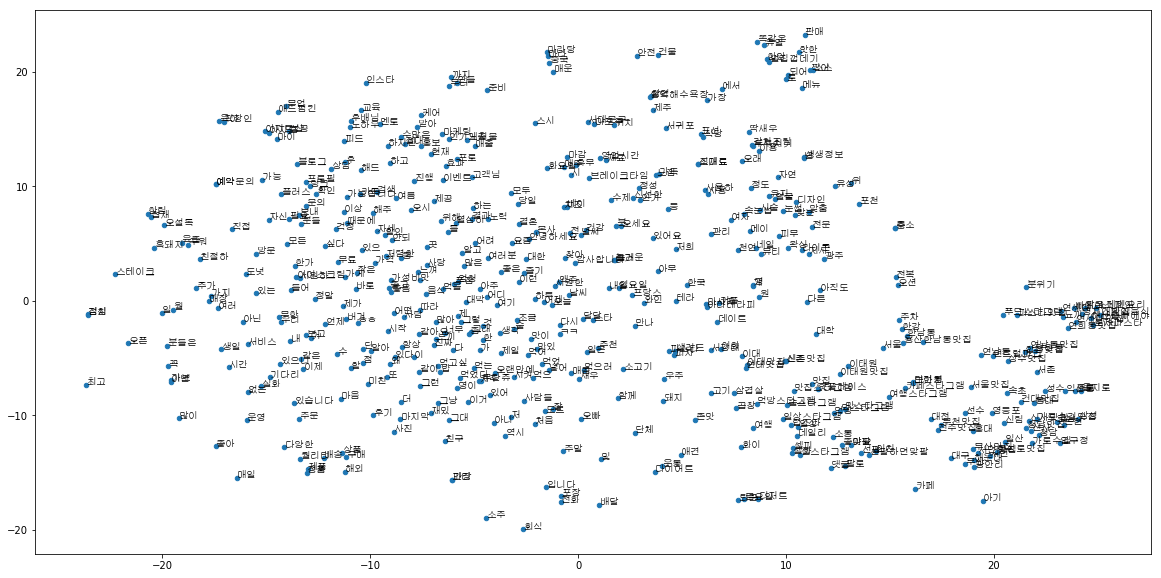

In [18]:
path = 'C:/Windows/Fonts/gulim.ttc'
plt.figure(figsize=(20,10))
fontprop = fm.FontProperties(fname=path, size=10)
plt.scatter(Dim['x'], Dim['y'], s = 20)
for word, pos in Dim.iterrows():
    plt.annotate(word, pos, fontProperties =fontprop)
    
plt.show()

In [20]:
model.init_sims(replace=True) # 메모리 잡아먹지 말라고 종료

In [21]:
from gensim.models import word2vec

print(word2vec.FAST_VERSION) ## will be slow.. 문제 확인차 버전 점검함

1


In [19]:
#새창
%matplotlib qt5
path = 'C:/Windows/Fonts/gulim.ttc'
plt.figure(figsize=(20,10))
fontprop = fm.FontProperties(fname=path, size=10)
plt.scatter(Dim['x'], Dim['y'], s = 20)
for word, pos in Dim.iterrows():
    plt.annotate(word, pos, fontProperties =fontprop)
    
plt.show()